# Hi

## This is my little testing SVM (SVC) model
## DataSet — Abalone params

### This is abalone :3
![abalone](abalone.png)

### It nice looking and his age a calculate with a cross section
### This method — is not cool
### And scientists had looking for a another way to do

### DataSet a found at UCI DATASETS
### Link → [Push me](https://archive.ics.uci.edu/ml/datasets/Abalone)

## Go lock at data

### I made a custom columns name, because default didn't make me happy

In [98]:
# ==============
# Import pandas
# ==============

import pandas as pd

# ==================
# Exception warnings
# ==================

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# https://archive.ics.uci.edu/ml/datasets/Abalone

# =========
# Load data
# =========

names = ['sex', 'length', 'diameter', 
         'height', 'whole_weight', 
         'shucked_weight', 'viscera_weight', 
         'shell_weight', 'rings']

data = pd.read_csv('abalone.data', header=None, names=names)
data.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### OK! Loaded right!

### Go check correlations and describe

In [99]:
data.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [100]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### There are no over-correlations with rings

### DataSet is fully, and have no NaN-values

### If you want to calculate age → you need to sum count of rings and 1.5

### I made a «target» data using this method :]

In [101]:
target = data.rings + 1.5
target.head(10)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
5     9.5
6    21.5
7    17.5
8    10.5
9    20.5
Name: rings, dtype: float64

In [102]:
target.describe()

count    4177.000000
mean       11.433684
std         3.224169
min         2.500000
25%         9.500000
50%        10.500000
75%        12.500000
max        30.500000
Name: rings, dtype: float64

In [103]:
target.unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

### There are too many values for classifier analisys

### And, I think, its good idea — to make only 3 classes

### I made with quantile 33% and 66%

### It's «must have» if you want to make equal counts of classes

In [104]:
q33 = target.quantile(0.33)
q66 = target.quantile(0.66)

print('The border between 1st and 2nd classes: \t{}'.format(q33))
print('The border between 2st and 3nd classes: \t{}'.format(q66))

The border between 1st and 2nd classes: 	9.5
The border between 2st and 3nd classes: 	12.5


### This is first 10 items before remastering

In [105]:
target.head(10)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
5     9.5
6    21.5
7    17.5
8    10.5
9    20.5
Name: rings, dtype: float64

### And after

In [106]:
target.loc[target <= q33] = 0
target.loc[(target > q33) & (target < q66)] = 1
target.loc[target >= q66] = 2
target.head(10)

0    2.0
1    0.0
2    1.0
3    1.0
4    0.0
5    0.0
6    2.0
7    2.0
8    1.0
9    2.0
Name: rings, dtype: float64

## Now
### Let's some sex changing :]

In [107]:
data.sex.unique()

array(['M', 'F', 'I'], dtype=object)

### «sex» column has 3 types:
### 1. M — Male, maybe
### 2. F — Female, maybe
### 3. I — I don't know what is it. Maybe Innovation \*___\*

In [108]:
data.sex = data.sex.replace(to_replace='M', value=0)
data.sex = data.sex.replace(to_replace='F', value=1)
data.sex = data.sex.replace(to_replace='I', value=2)
data.sex = data.sex.astype('category')

### I set a «category» type
### Because I love right-changed category ^___^

In [109]:
data.dtypes

sex               category
length             float64
diameter           float64
height             float64
whole_weight       float64
shucked_weight     float64
viscera_weight     float64
shell_weight       float64
rings                int64
dtype: object

### Delete column «rings» from data variable

In [110]:
data = data.drop('rings', 1)
data.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
5,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
6,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
7,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
8,0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
9,1,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320


### train_test_split — must-have-function!

In [111]:
# ========================================
# Separating data: train + test + validate
# ========================================

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, target, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, random_state=0)

### Checking shapes of splitted datas

In [112]:
# ===========================================================
# First helper-fuction for easy checking shapes of DataFrames
# ===========================================================

def pr_shape(X, name='NoName', end='\n'):
    print('{}\'s shape: \t{}'.format(name, X.shape), end=end)

# ============    
# And using :)
# ============

pr_shape(X_train, name='X_train')
pr_shape(X_test, name='X_test')
pr_shape(X_valid, name='X_valid', end='\n\n')

pr_shape(y_train, name='y_train')
pr_shape(y_test, name='y_test')
pr_shape(y_valid, name='y_valid', end='\n\n')

X_train's shape: 	(3132, 8)
X_test's shape: 	(783, 8)
X_valid's shape: 	(262, 8)

y_train's shape: 	(3132,)
y_test's shape: 	(783,)
y_valid's shape: 	(262,)



## Test nude SVC model

In [113]:
# ========
# Load SVC
# ========

from sklearn.svm import SVC

# ===============================
# Training empty-params model SVC
# ===============================

svc_nude = SVC()
svc_nude.fit(X_train, y_train)

# ===============
# Checking scores
# ===============

print('Train score: {:.3f}'.format(svc_nude.score(X_train, y_train)))
print('Test score: {:.3f}'.format(svc_nude.score(X_test, y_test)))
print('Valid score: {:.3f}'.format(svc_nude.score(X_valid, y_valid)))

Train score: 0.613
Test score: 0.604
Valid score: 0.611


### Load another nice modules

In [114]:
# =========================
# Import my love (graphics)
# =========================

import matplotlib.pyplot as plt
%matplotlib inline

# =====================================
# And a little bit of numpy (all numpy)
# =====================================

import numpy as np

### Two functions for fast getting results and plots

In [115]:
# ===============================
# Help-function to train model... 
# with one variable parameter:...
# «C» or «kernel»             ...
# and ability to print results...
# using plot
# ===============================

def loop_bl(list_data, list_param, style='c'):
    train_sc_list = []
    test_sc_list = []
    valid_sc_list = []
    average_sc_list = []
    
    for i in range(len(list_param)):
        if style == 'c':
            model = SVC(C=list_param[i])
        elif style == 'k':
            model = SVC(kernel=list_param[i])
    
        model.fit(list_data[0], list_data[1])
        
        train_sc_list.append(model.score(list_data[0], list_data[1]))
        test_sc_list.append(model.score(list_data[2], list_data[3]))
        valid_sc_list.append(model.score(list_data[4], list_data[5]))
        
        train_sc = model.score(list_data[0], list_data[1])
        test_sc = model.score(list_data[2], list_data[3])
        valid_sc = model.score(list_data[4], list_data[5])
        
        list_scores = [train_sc, test_sc, valid_sc]
        ave_sc = sum(list_scores) / len(list_scores)
        average_sc_list.append(ave_sc)
        
        if style == 'c':
            print('= C: {:.3f}'.format(list_param[i]))
        elif style == 'k':
            print('= Kernel: {}'.format(list_param[i]))
            
        print('Train score: {:.2f}'.format(train_sc))
        print('Test score: {:.2f}'.format(test_sc))        
        print('Valid score: {:.2f}'.format(valid_sc))
        
        print('\n')
    
    plt.figure(figsize=(10,10))
    plt.plot(train_sc_list, 'C1-', label='train', linewidth=3)
    plt.plot(test_sc_list, 'C2-', label='test', linewidth=3)
    plt.plot(valid_sc_list, 'C3-', label='valid', linewidth=3)
    plt.plot(average_sc_list, 'k--', label='average', linewidth=6)
    plt.plot()
    plt.legend(loc='best', prop={'size': 20})
    plt.grid(linestyle='--')
    plt.xticks(np.arange(len(list_param)), tuple(list_param))

In [116]:
# ==================================
# This func can check both params...
# and make plots
# ==================================    

def loop_power(list_data, list_c, list_kernel):
    train_sc_list = []
    test_sc_list = []
    
    cols_plot = len(list_kernel)
    rows_plot = len(list_c)
    
    cols_plot_p1 = cols_plot+1
    rows_plot_p1 = rows_plot+1

    for ic in range(rows_plot):
        for ik in range(cols_plot):
            model = SVC(C=list_c[ic], kernel=list_kernel[ik])

            model.fit(list_data[0], list_data[1])

            train_sc = model.score(list_data[0], list_data[1])
            test_sc = model.score(list_data[2], list_data[3])
            
            train_sc_list.append(train_sc)
            test_sc_list.append(test_sc)                   

        plt.plot(train_sc_list, 'C1-', label='train', linewidth=3)
        plt.plot(test_sc_list, 'C2-', label='test', linewidth=3)

        plt.ylim(bottom=0, top=1)
        plt.xticks(np.arange(cols_plot), tuple(list_kernel))
        
        plt.title('C: {}'.format(list_c[ic]))
        plt.legend(loc='best')
        plt.grid(linestyle='--')
        
        plt.figure(figsize=(10,10))
        
        plt.show()
        
        train_sc_list = []
        test_sc_list = []

### Prepearing lists for functions

In [117]:
list_data = [X_train, y_train, X_test, y_test, X_valid, y_valid]
list_c = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
list_kernel = ['rbf', 'linear', 'poly', 'sigmoid']

## LOOP C

= C: 0.001
Train score: 0.34
Test score: 0.36
Valid score: 0.38


= C: 0.010
Train score: 0.52
Test score: 0.56
Valid score: 0.57


= C: 0.100
Train score: 0.55
Test score: 0.56
Valid score: 0.59


= C: 1.000
Train score: 0.61
Test score: 0.60
Valid score: 0.61


= C: 10.000
Train score: 0.65
Test score: 0.64
Valid score: 0.63


= C: 100.000
Train score: 0.66
Test score: 0.65
Valid score: 0.66


= C: 1000.000
Train score: 0.67
Test score: 0.66
Valid score: 0.69




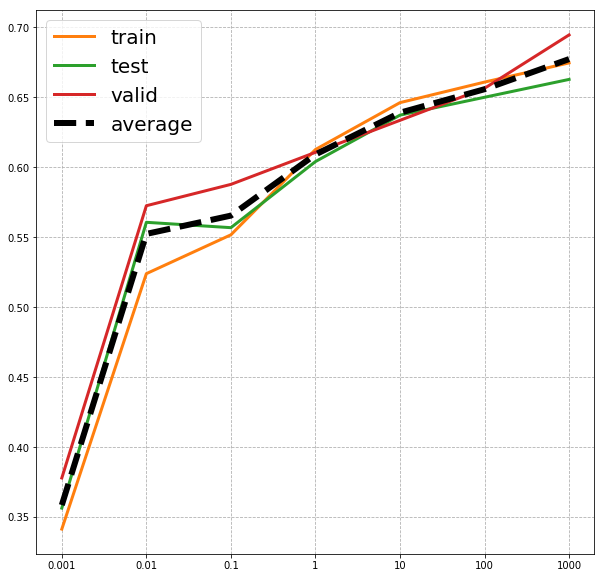

In [118]:
loop_bl(list_data, list_param=list_c, style='c')

## LOOP Kernel

= Kernel: rbf
Train score: 0.61
Test score: 0.60
Valid score: 0.61


= Kernel: linear
Train score: 0.64
Test score: 0.64
Valid score: 0.63


= Kernel: poly
Train score: 0.55
Test score: 0.54
Valid score: 0.59


= Kernel: sigmoid
Train score: 0.53
Test score: 0.51
Valid score: 0.55




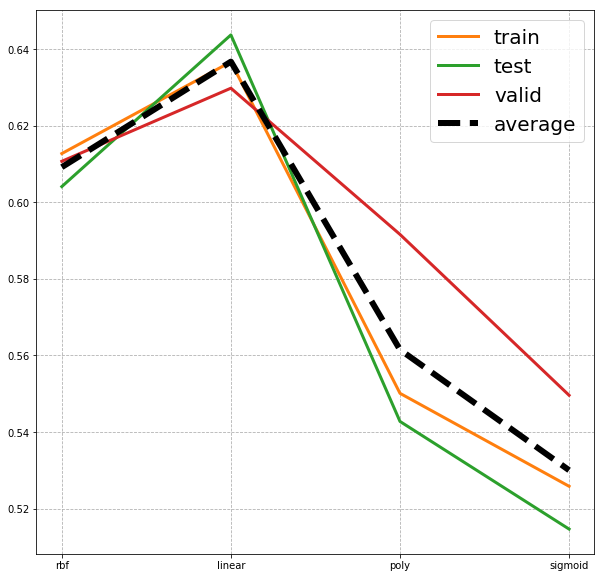

In [119]:
loop_bl(list_data, list_param=list_kernel, style='k')

### The best results gave this params:
### – C → 1000+
### – Kernel = 'linear'

### Let's watch, how this params will work together

In [120]:
svc_power = SVC(C=1000, kernel='linear')
svc_power.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Don't watch) I just love functions)

In [121]:
# =====================================
# Func for simple showing model results
# =====================================

def print_ttv_result(model, X_train, X_test, X_valid, y_train, y_test, y_valid):
    print('Train score: \t{:.3f}'.format(model.score(X_train, y_train)))
    print('Test score: \t{:.3f}'.format(model.score(X_test, y_test)))
    print('Valid score: \t{:.3f}'.format(model.score(X_valid, y_valid)))

In [122]:
print_ttv_result(svc_power, X_train, X_test, X_valid, y_train, y_test, y_valid)

Train score: 	0.646
Test score: 	0.659
Valid score: 	0.645


## LOOP C + Kernel

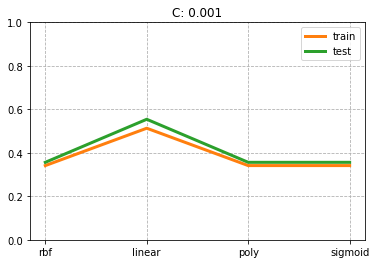

<Figure size 720x720 with 0 Axes>

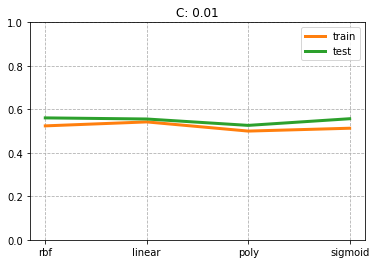

<Figure size 720x720 with 0 Axes>

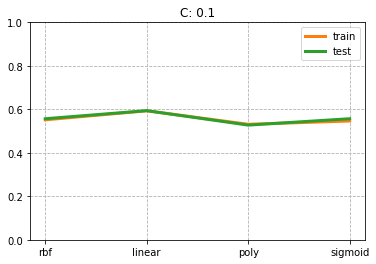

<Figure size 720x720 with 0 Axes>

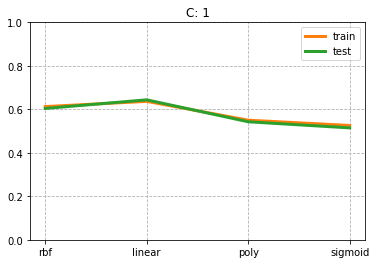

<Figure size 720x720 with 0 Axes>

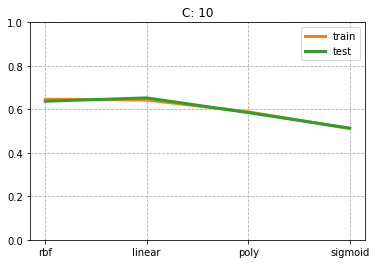

<Figure size 720x720 with 0 Axes>

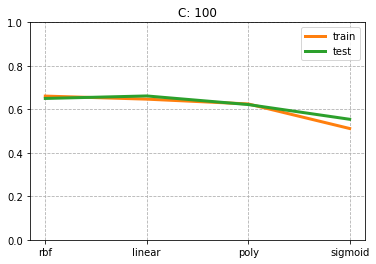

<Figure size 720x720 with 0 Axes>

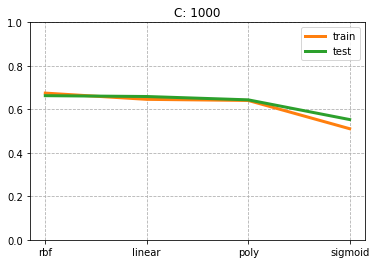

<Figure size 720x720 with 0 Axes>

In [123]:
loop_power(list_data, list_c, list_kernel)

# PS

### → This model with that separation and conditions gave best result ~ 60–70%
### → DataSet needs regression analysis, and this separating was a little bit useless

# Good Luck!

![giphy](giphy.gif)